In [1]:
import itertools
import pylab              as     pl
import networkx           as     nx
import numpy              as     np
import matplotlib.pyplot  as     plt

from   scipy.spatial      import Delaunay

In [2]:
np.random.seed(3)

In [3]:
pos = np.random.uniform(size=(16, 2))

In [4]:
# https://en.wikipedia.org/wiki/Delaunay_triangulation
tri = Delaunay(pos)

In [5]:
simplices = tri.simplices
simplices

array([[ 5,  4,  8],
       [ 4,  5,  3],
       [ 4,  1,  8],
       [ 7,  6, 15],
       [ 1,  7,  0],
       [ 7,  1,  6],
       [ 2,  7, 15],
       [ 6,  9, 11],
       [ 1,  9,  6],
       [ 9,  4,  3],
       [ 9,  1,  4],
       [10,  1,  0],
       [10, 14,  8],
       [ 1, 10,  8],
       [12,  2, 14],
       [12, 10,  0],
       [10, 12, 14],
       [ 7, 12,  0],
       [ 2, 12,  7],
       [13,  3, 11],
       [ 9, 13, 11],
       [13,  9,  3]], dtype=int32)

In [6]:
# simplices = [np.sort(x) for x in simplices]

In [7]:
G = nx.Graph()

In [8]:
for path in simplices:
    nx.add_path(G, path)

In [9]:
# G.add_edge(1, 2)

In [10]:
# There are no complaints when adding existing nodes or edges
# G.add_edges_from([(0,1), (1, 2), (0, 2)])

In [11]:
# pos = np.array([[0.5, 0.0], [0.0,0.5], [1.0,0.5]])

In [12]:
G.nodes

NodeView((5, 4, 8, 3, 1, 7, 6, 15, 0, 2, 9, 11, 10, 14, 12, 13))

In [13]:
G.edges

EdgeView([(5, 4), (5, 3), (4, 8), (4, 1), (4, 9), (4, 3), (8, 1), (8, 14), (8, 10), (3, 13), (3, 11), (3, 9), (1, 7), (1, 6), (1, 9), (1, 10), (1, 0), (7, 6), (7, 0), (7, 2), (7, 15), (7, 12), (6, 15), (6, 9), (0, 10), (0, 12), (2, 12), (2, 14), (9, 11), (9, 13), (11, 13), (10, 14), (10, 12), (14, 12)])

In [14]:
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
# Note: https://link.springer.com/content/pdf/10.1007/s11222-007-9033-z.pdf
G.degree[1]

7

In [15]:
# Neighbors
G.adj[1]

AtlasView({4: {}, 8: {}, 7: {}, 6: {}, 9: {}, 10: {}, 0: {}})

In [16]:
# the number of edges incident to 1
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
G.degree[1]  

7

In [17]:
# G   = nx.petersen_graph()

In [18]:
# pos = nx.spring_layout(G)

In [19]:
def color(x, y):
    return np.sin(y) * np.sin(x)

In [20]:
colors      = color(pos[:,0], pos[:,1])
node_colors = dict(zip(G.nodes, colors))
node_order  = dict(zip(G.nodes, np.argsort(colors)))

In [21]:
nx.set_node_attributes(G, node_colors, 'vertex_eval')

In [22]:
nx.set_node_attributes(G, node_order, 'vertex_order')

In [23]:
# nx.get_node_attributes(G, 'vertex_eval')

In [24]:
def edge_eval(G, u, v, epsilon=5.e-1):
    # Eqn. (2) of https://arxiv.org/pdf/1009.4015.pdf for 1-simplexs.
    # Max. F(facet i.e. vertex) + epsilon * sum(F(vertices)).
    
    vertex_evals = nx.get_node_attributes(G, 'vertex_eval')
    
    u_eval       = vertex_evals[u]
    v_eval       = vertex_evals[v]
    
    if v in G[u]:
        G[u][v]['edge_eval'] = np.maximum(u_eval,v_eval) + epsilon * np.sum([u_eval, v_eval])
        G[u][v]['edge_dist'] = np.linalg.norm(pos[u] - pos[v])
        
        G[u][v]['edge_eval'] = G[v][u]['edge_eval']
        G[u][v]['edge_dist'] = G[v][u]['edge_dist']

In [25]:
for u in G.nodes:
    for v in G.neighbors(u):
        edge_eval(G,u,v)

In [26]:
edge_colors = nx.get_edge_attributes(G, name='edge_dist')
edge_colors = np.array([edge_colors[x] for x in list(G.edges())])
edge_colors

array([0.02688717, 0.26731175, 0.12120184, 0.24946507, 0.20936963,
       0.24504494, 0.27120906, 0.52442048, 0.29222392, 0.18137612,
       0.31887265, 0.24712747, 0.39357386, 0.42698645, 0.10082367,
       0.18245961, 0.32631231, 0.31354979, 0.17174176, 0.37449045,
       0.31062844, 0.23067759, 0.51184587, 0.41313293, 0.26769396,
       0.07242842, 0.36710002, 0.50656461, 0.3154654 , 0.19880592,
       0.14905336, 0.26472153, 0.27529169, 0.22114569])

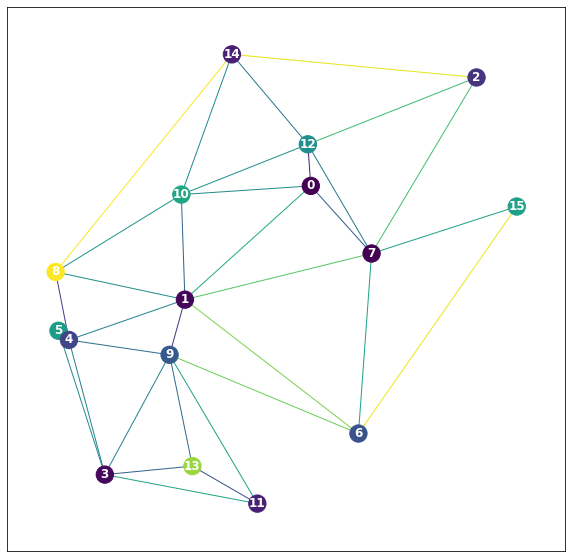

In [27]:
ubax1 = plt.subplots(1, 1, figsize=(10,10))

# keywords:  nx.draw_networkx?
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color=colors, edge_color=edge_colors, font_color='w')

# nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', node_color=colors, edge_color=edge_colors, font_color='w')

limits = plt.axis('on')

In [28]:
edge_colors = nx.get_edge_attributes(G, name='edge_eval')
edge_colors = np.array([edge_colors[x] for x in list(G.edges())])
edge_colors

array([0.58073197, 0.52350558, 0.98264157, 0.22131345, 0.33822603,
       0.22322493, 0.9235037 , 0.94572512, 1.09477754, 0.78671235,
       0.11279633, 0.28099964, 0.03951323, 0.26024389, 0.27908816,
       0.55772135, 0.03928205, 0.25585727, 0.02612219, 0.16166543,
       0.52958119, 0.46363746, 0.6060825 , 0.35120285, 0.55310356,
       0.46340628, 0.50874148, 0.18827347, 0.3014165 , 0.86319698,
       0.80712921, 0.57994277, 0.6990961 , 0.4902455 ])

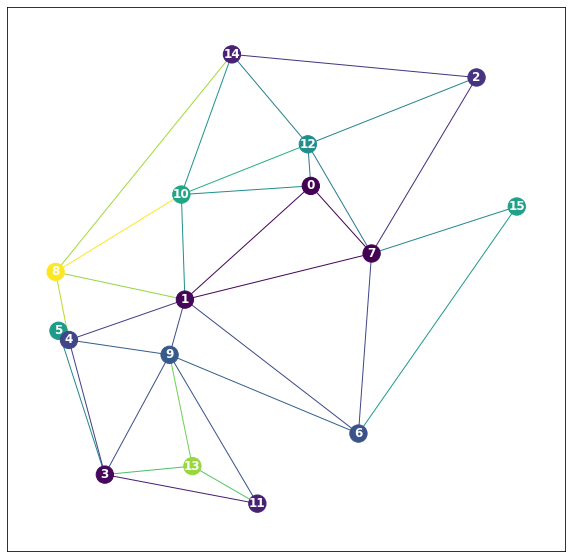

In [29]:
ubax1 = plt.subplots(1, 1, figsize=(10,10))

# keywords:  nx.draw_networkx?
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color=colors, edge_color=edge_colors, font_color='w')

# nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', node_color=colors, edge_color=edge_colors, font_color='w')

limits = plt.axis('on')

A k-simplex σk is the convex hull of k + 1 affinely independent points S = {p0 , ..., pk }. In other words, it is the set of points within the smallest possible solid with summits the k + 1 points in S.

In [30]:
# 0-simplexs 
G.nodes

NodeView((5, 4, 8, 3, 1, 7, 6, 15, 0, 2, 9, 11, 10, 14, 12, 13))

In [31]:
# 1-simplexs
G.edges

EdgeView([(5, 4), (5, 3), (4, 8), (4, 1), (4, 9), (4, 3), (8, 1), (8, 14), (8, 10), (3, 13), (3, 11), (3, 9), (1, 7), (1, 6), (1, 9), (1, 10), (1, 0), (7, 6), (7, 0), (7, 2), (7, 15), (7, 12), (6, 15), (6, 9), (0, 10), (0, 12), (2, 12), (2, 14), (9, 11), (9, 13), (11, 13), (10, 14), (10, 12), (14, 12)])

In [32]:
G.degree[2]  

3

In [33]:
G.adj[2]

AtlasView({7: {'edge_eval': 0.16166542985044557, 'edge_dist': 0.3744904489012385}, 12: {'edge_eval': 0.5087414795360814, 'edge_dist': 0.3671000193102735}, 14: {'edge_eval': 0.18827346868746006, 'edge_dist': 0.5065646132785163}})

In [34]:
# Number of triangles keyed by node label.
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.triangles.html
# nx.triangles(G)

Returns all cliques in an undirected graph.
This function returns an iterator over cliques, each of which is a list of nodes. The iteration is ordered by cardinality
of the cliques: first all cliques of size one, then all cliques of size two, etc.

In [35]:
# https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf
all_cliques   = nx.enumerate_all_cliques(G)

triad_cliques = np.array([x for x in all_cliques if len(x) == 3])
# triad_cliques = np.sort(triad_cliques)
triad_cliques

array([[ 5,  4,  3],
       [ 4,  8,  1],
       [ 4,  3,  9],
       [ 4,  1,  9],
       [ 8,  1, 10],
       [ 8, 10, 14],
       [ 3,  9, 11],
       [ 3,  9, 13],
       [ 3, 11, 13],
       [ 1,  7,  6],
       [ 1,  7,  0],
       [ 1,  6,  9],
       [ 1,  0, 10],
       [ 7,  6, 15],
       [ 7,  0, 12],
       [ 7,  2, 12],
       [ 0, 10, 12],
       [ 2, 14, 12],
       [ 9, 11, 13],
       [10, 14, 12]], dtype=int32)

In [36]:
def circumcircle(tri_clique, ndim=2):
    # https://mathworld.wolfram.com/Circumcircle.html
    # Assumes 2D
    
    tri_pos =  pos[tri_clique]   
    
    r2      =  np.sum(tri_pos**2., axis=1)
    DD      =  np.append(tri_pos, np.ones((len(tri_pos), 1)), axis=1)
    DD      =  np.append(r2[:,None], DD, axis=1)
        
    aa      =  np.linalg.det(DD[:,1:])
    cc      = -np.linalg.det(DD[:,:-1])

    signs   =  (-1.) ** np.arange(ndim)
    signs  *=   -1.

    bs      = []
    
    for i in np.arange(1, 1 + ndim, 1):    
        include = list(np.arange(2 + ndim))
        include.pop(i)
    
        _DD = DD[:, include]
                
        bs.append(np.linalg.det(_DD))
        
    bs      = np.array(bs)
    bs     *= signs
 
    x0      = -bs / 2. / aa 
    
    radius  = np.sqrt(np.sum(bs**2.) - 4. * aa * cc) / 2. / aa
    
    return  {'x0': tuple(x0), 'radius': radius, 'clique': tri_clique}

If two triangles share an edge in the Delaunay triangulation, their circumcenters are to be connected with an edge in the Voronoi tesselation. 

In [37]:
H = nx.Graph()

In [38]:
result = []

for i, tri_clique in enumerate(triad_cliques):
    result.append((i, circumcircle(tri_clique)))

In [39]:
H.add_nodes_from(result)

In [40]:
H.nodes[0]

{'x0': (-0.09521406571679047, 0.26571980675184276),
 'radius': -0.22841172409016272,
 'clique': array([5, 4, 3], dtype=int32)}

In [41]:
def voronoi_connect(H, u, v):
    '''
    Two voroni centers are connected if they're Delaunay triangle share an edge.
    '''
    
    if u == v:
        return False
    
    clique_a = H.nodes[u]['clique']
    clique_b = H.nodes[v]['clique']

    a_pairs  = set(itertools.combinations(clique_a, 2))
    b_pairs  = set(itertools.combinations(clique_b, 2))
    
    intersection = a_pairs.intersection(b_pairs)
    
    return len(intersection) > 0

In [42]:
voronoi_connect(H, 0, 0)

False

In [43]:
for u in range(len(H.nodes)):
    for v in list(H.nodes):
        connect = voronoi_connect(H, u, v)
        
        # print(u, v, connect)
        
        if connect:
            H.add_edge(u, v)

(-0.1, 1.1)

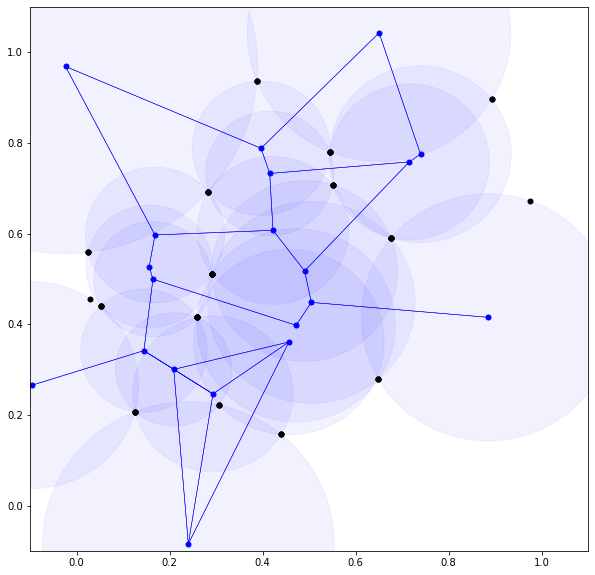

In [44]:
fig, ax = plt.subplots(figsize=(10,10))

# limits = plt.axis('on')

for i in H.nodes:    
    x0      = H.nodes[i]['x0']
    radius  = H.nodes[i]['radius']
    clique  = H.nodes[i]['clique'] 

    tri_pos = pos[clique]
    
    # print(x0, radius, clique)
    
    circle  = plt.Circle(x0, radius, color='blue', clip_on=True, alpha=0.05)

    ax.plot(tri_pos[:,0], tri_pos[:,1], marker='.', lw=0.0, c='k', markersize=10)
    ax.plot(x0[0], x0[1], marker='.', lw=0.0, c='b', markersize=10)
    
    ax.add_patch(circle)
    
    neighbors = list(H.neighbors(i))

    for nn in neighbors:
        nei_pos = H.nodes[nn]['x0']
        line    = np.vstack([x0, nei_pos])

        ax.plot(line[:,0], line[:,1], c='b', lw=0.5)
    
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

In [45]:
def calc_theta(beta):
    if beta >=1:
        theta = np.arcsin(1. / beta)
        
    else:
        theta = np.pi - np.arcsin(beta)

    theta_deg = np.degrees(theta)
    
    return theta, theta_deg

In [46]:
def in_betaskeleton(G, beta=2.0):
    theta, theta_deg = calc_theta(beta)
        
    pqs = list(G.edges)
        
    for pq in pqs:
            p                = pq[0]
            q                = pq[1]
        
            pq               = set([p,q])
            
            aa               = G[p][q]['edge_dist']
            
            isin             = [(p in x) and (q in x) for x in triad_cliques]

            # At most two rows.
            triad_cliques_pq = triad_cliques[isin]
            
            in_beta          = True
            
            for x in triad_cliques_pq:
                x            = set(x)
                s            = x.symmetric_difference(pq).pop()
                                
                pqs          = [p,q,s]
                                                
                pairs        = list(itertools.combinations(pqs, 2))
                pairs.remove((p,q))
                
                # print(p, q, s, pairs)
                
                bb,cc        = pairs
                
                bb           = G[bb[0]][bb[1]]['edge_dist']
                cc           = G[cc[0]][cc[1]]['edge_dist']
                
                # Cosine rule
                opening      = (bb**2. + cc**2. - aa**2.) / (2. * bb * cc)
                opening      = np.arccos(opening)

                ratio        = aa / np.sin(opening)

                BB           = np.arcsin(bb / ratio)
                CC           = np.arcsin(cc / ratio)
                
                BB          *= 180. / np.pi
                CC          *= 180. / np.pi
                
                opening     *= 180. / np.pi
                                
                in_beta     &= opening < theta_deg
                        
                print('{:d}\t{:d}\t{:d}\t{:f}\t{:f}\t{:f}\t{:f}\t{:f}\t{:f}\t{:f}'.format(p, q, s, aa, bb, cc, theta_deg, opening, BB, CC))
                
                # break
                
            G[p][q]['in_beta'] = in_beta
            
            # break

Text(0, 0.5, '$\\theta$')

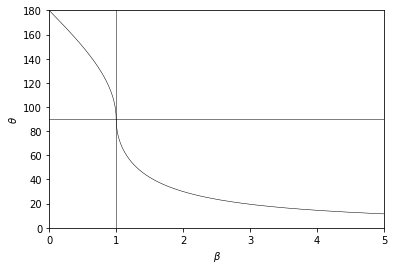

In [47]:
betas  = np.arange(0.0, 10., 1.e-4)
thetas = np.array([calc_theta(beta)[1] for beta in betas])

pl.axvline(1.,  c='k', lw=0.5)
pl.axhline(90., c='k', lw=0.5)

pl.plot(betas, thetas, c='k', lw=0.5)

pl.xlim(0.,   5.)
pl.ylim(0., 180.)

pl.xlabel(r'$\beta$')
pl.ylabel(r'$\theta$')

In [48]:
beta = 1.0  

in_betaskeleton(G, beta=beta)

5	4	3	0.026887	0.267312	0.245045	90.000000	3.374196	35.813821	32.439625
5	3	4	0.267312	0.026887	0.245045	90.000000	144.186179	3.374196	32.439625
4	8	1	0.121202	0.249465	0.271209	90.000000	26.500184	66.692942	86.806874
4	1	8	0.249465	0.121202	0.271209	90.000000	66.692942	26.500184	86.806874
4	1	9	0.249465	0.209370	0.100824	90.000000	101.243470	55.403048	23.353483
4	9	3	0.209370	0.245045	0.247127	90.000000	50.349656	64.309396	65.340948
4	9	1	0.209370	0.249465	0.100824	90.000000	55.403048	78.756530	23.353483
4	3	5	0.245045	0.026887	0.267312	90.000000	32.439625	3.374196	35.813821
4	3	9	0.245045	0.209370	0.247127	90.000000	64.309396	50.349656	65.340948
8	1	4	0.271209	0.121202	0.249465	90.000000	86.806874	26.500184	66.692942
8	1	10	0.271209	0.292224	0.182460	90.000000	64.961605	77.482123	37.556272
8	14	10	0.524420	0.292224	0.264722	90.000000	140.594361	20.715910	18.689729
8	10	1	0.292224	0.271209	0.182460	90.000000	77.482123	64.961605	37.556272
8	10	14	0.292224	0.524420	0.264722	90.000000	20

Text(0.5, 1.0, '1.00 $\\beta$-skeleton')

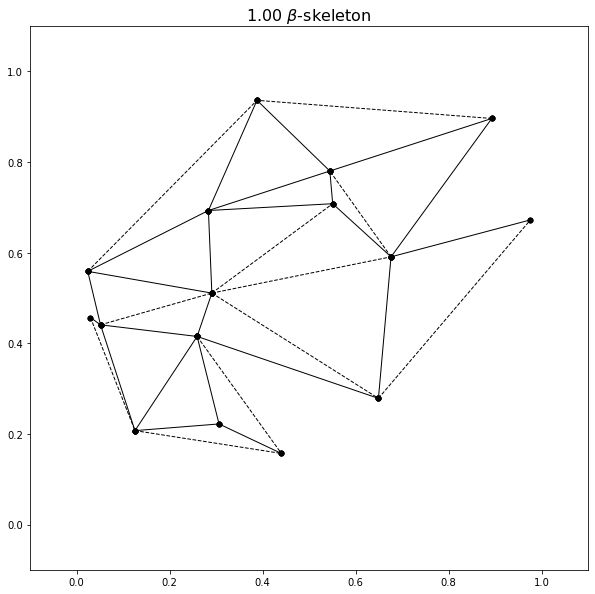

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

for key in G.edges:    
    edge_dict = G.edges[key]
    
    edge_pos  = pos[list(key)]
    
    in_beta   = edge_dict['in_beta']

    if in_beta:
        linestyle = '-'
    
    else:
        linestyle = '--'
        
    ax.plot(edge_pos[:,0], edge_pos[:,1], marker='.', lw=1.0, c='k', markersize=10, linestyle=linestyle)
    
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

ax.set_title(r'{:.2f} $\beta$-skeleton'.format(beta), fontsize=16)

# Done.